In [1]:
def load_data(url):
    import pandas as pd
    # Load dataset
    data = pd.read_csv(filepath_or_buffer=url,sep=',')
    return data

def train_test_split(final_data,target_column):
    from sklearn.model_selection import train_test_split
    X = final_data.loc[:, final_data.columns != target_column]
    y = final_data.loc[:, final_data.columns == target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=47)
    return X_train, X_test, y_train, y_test

def training_basic_classifier(X_train,y_train):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression()
    classifier.fit(X_train,y_train)
    
    return classifier

def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

def predict_prob_on_test_data(model,X_test):
    y_pred = model.predict_proba(X_test)
    return y_pred

def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred,average='micro')
    recall = recall_score(y_true, y_pred,average='micro')
    entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}

def create_roc_auc_plot(clf, X_data, y_data):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    metrics.plot_roc_curve(clf, X_data, y_data) 
    plt.savefig('roc_auc_curve.png')

def create_confusion_matrix_plot(clf, X_test, y_test):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    y_pred = predict_on_test_data(model,X_test)
    metrics.ConfusionMatrixDisplay.from_predictions(y_pred=y_pred, y_true=y_test) 
    plt.savefig("confusion_matrix.png")

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


C:\Users\blazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\blazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor']
[[9.60709896e-01 3.92891052e-02 9.98900925e-07]
 [9.34708609e-01 6.52907910e-02 5.99812544e-07]
 [9.70974492e-01 2.90252489e-02 2.58880764e-07]
 [9.54952285e-01 4.50452327e-02 2.48198011e-06]
 [1.74794782e-04 1.07990805e-01 8.91834400e-01]
 [1.59399373e-

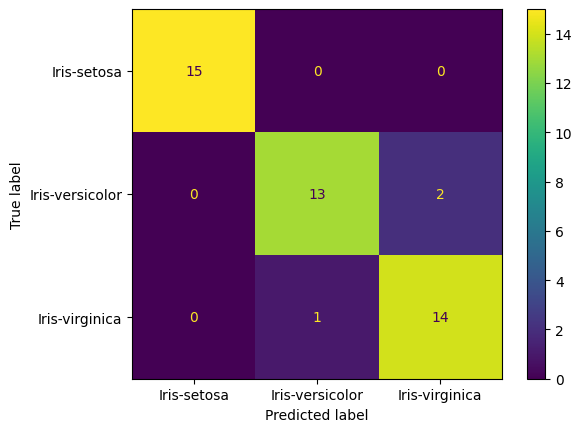

In [2]:


url = 'https://raw.githubusercontent.com/TripathiAshutosh/dataset/main/iris.csv'
data = load_data(url)
print(data.head())


target_column = 'class'
X_train, X_test, y_train, y_test = train_test_split(data, target_column)

model = training_basic_classifier(X_train,y_train)

y_pred = predict_on_test_data(model,X_test)
print(y_pred)
y_pred_prob = predict_prob_on_test_data(model,X_test)
print(y_pred_prob)

run_metrics = get_metrics(y_test, y_pred, y_pred_prob)

print(run_metrics)
create_confusion_matrix_plot(model, X_test, y_test)

In [3]:
def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    import mlflow
    mlflow.set_tracking_uri("http://localhost:5000") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run(run_name=run_name):
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Iris Classifier")
        mlflow.set_tags({"tag2":"Logistic Regression", "tag3":"Multiclassification using Ovr - One vs rest class"})
        mlflow.sklearn.log_model(model, "model")
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))



In [4]:
from datetime import datetime
experiment_name = "iris_classifier_"+ str(datetime.now().strftime("%d-%m-%y")) ##basic classifier
run_name="iris_classifier_"+str(datetime.now().strftime("%d-%m-%y"))
create_experiment(experiment_name,run_name,run_metrics,model,'confusion_matrix.png')


2023/05/18 11:46:54 INFO mlflow.tracking.fluent: Experiment with name 'iris_classifier_18-05-23' does not exist. Creating a new experiment.


Run - iris_classifier_18-05-23 is logged to Experiment - iris_classifier_18-05-23


C:\Users\blazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
